# Lab Task 05: Regression on World Happiness Index Dataset

Term 1 2019 - Instructor: Teerapong Leelanupab

Teaching Assistant: Suttida Satjasunsern

***

### Step 1.
Load the 2017 World Happiness Index data into a Pandas Data Frame

[labtask05-data/happiness2017.csv](labtask05-data/happiness2017.csv)

In [87]:
import pandas as pd 
import numpy as np
data = pd.read_csv("happiness2017.csv",index_col='Country') 
data.head()

Happiness    Family    Health   Freedom
Country                                             
Afghanistan      3.794  0.581543  0.180747  0.106180
Albania          4.644  0.803685  0.731160  0.381499
Algeria          5.872  1.146217  0.617585  0.233336
Angola           3.795  1.104412  0.049869  0.000000
Argentina        6.599  1.440451  0.695137  0.494519

### Step 2.
Calculate basic summary statistics for the data.

In [88]:
data.describe()

Happiness      Family      Health     Freedom
count  155.000000  155.000000  155.000000  155.000000
mean     5.354019    1.188898    0.551341    0.408786
std      1.131230    0.287263    0.237073    0.149997
min      2.693000    0.000000    0.000000    0.000000
25%      4.505500    1.042635    0.369866    0.303677
50%      5.279000    1.253918    0.606042    0.437454
75%      6.101500    1.414316    0.723008    0.516561
max      7.537000    1.610574    0.949492    0.658249

### Step 3.
Generate a boxplot of the numeric variables in the dataset.

In [89]:
data.boxplot()

### Step 4. 
Apply a simple linear regression to learn (fit) the model, where *Family* is the independent variable and *Happiness* is the target variable that we would like to predict. Produce a plot of the regression line. Find also the values for MAE, MSE, and RMSE.

In [90]:
X = data[['Family']]
y = data['Happiness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
coef_dt = pd.DataFrame(regressor.coef_,X.columns,columns=["Coefficient"])
coef_dt

Coefficient
Family     2.869908

In [93]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head(25)

Actual  Predicted
Country                                    
Central African Republic   2.693   1.893927
Moldova                    5.838   5.486552
Yemen                      3.593   4.578389
Poland                     5.973   6.042988
Cameroon                   4.695   4.608913
Austria                    7.006   6.083836
Finland                    7.469   6.314294
Palestinian Territories    4.775   5.210529
Hungary                    5.324   5.748596
Senegal                    4.535   5.279535
Mexico                     6.578   5.368991
Malta                      6.527   6.165532
Thailand                   6.424   5.985821
Honduras                   5.181   5.176945
Philippines                5.430   5.492556
Egypt                      4.735   4.756579
Costa Rica                 7.079   5.958876
Zambia                     4.514   4.772983
Kosovo                     5.279   5.159463
South Korea                5.838   5.131972
Netherlands                7.377   5.994852
Azerbaijan                 5.234   5.201210
Togo                       3.495   3.133391
United Kingdom             6.714   6.188631
Denmark                    7.522   6.345504

In [94]:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

1.8939273406936956
[2.86990834]


In [95]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5192484679158147
Mean Squared Error: 0.42724073002696444
Root Mean Squared Error: 0.6536365427567253


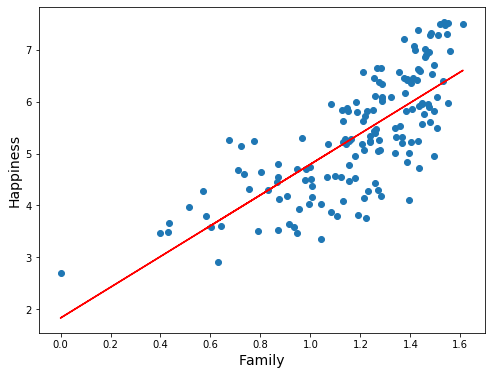

In [96]:
plt.figure(figsize=(8,6))
plt.scatter(data["Family"], data["Happiness"])
plt.xlabel("Family",fontsize=14)
plt.ylabel("Happiness",fontsize=14)
# add the predictions from regression
plt.plot(x, model.predict(x), color="red")
plt.show()

### Step 5.
Repeat the process from Step 4, but this time use *Health* as the independent variable. Produce a plot of the regression line. Find also the values for MAE, MSE, and RMSE.

In [97]:
X = data[['Health']]
y = data['Happiness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
coef_dt = pd.DataFrame(regressor.coef_,X.columns,columns=["Coefficient"])
coef_dt

Coefficient
Health     3.604924

In [100]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head(25)

Actual  Predicted
Country                                    
Central African Republic   2.693   3.391455
Moldova                    5.838   5.448758
Yemen                      3.593   4.441599
Poland                     5.973   5.845337
Cameroon                   4.695   3.802847
Austria                    7.006   6.262978
Finland                    7.469   6.240733
Palestinian Territories    4.775   5.362967
Hungary                    5.324   5.803116
Senegal                    4.535   4.799503
Mexico                     6.578   5.883201
Malta                      6.527   6.286828
Thailand                   6.424   5.657029
Honduras                   5.181   5.423900
Philippines                5.430   5.010918
Egypt                      4.735   5.199017
Costa Rica                 7.079   6.061754
Zambia                     4.514   4.253260
Kosovo                     5.279   5.275674
South Korea                5.838   6.568984
Netherlands                7.377   6.246279
Azerbaijan                 5.234   5.273237
Togo                       3.495   4.214578
United Kingdom             6.714   6.226956
Denmark                    7.522   6.180920

In [101]:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

3.3237808534843163
[3.60492426]


In [102]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6033529658692747
Mean Squared Error: 0.5077944545745245
Root Mean Squared Error: 0.7125969790663756


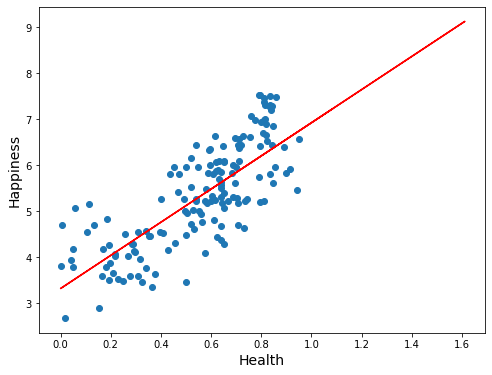

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(data["Health"], data["Happiness"])
plt.xlabel("Health",fontsize=14)
plt.ylabel("Happiness",fontsize=14)
# add the predictions from regression
plt.plot(x, regressor.predict(x), color="red")
plt.show()

### Step 6.
Repeat the process from Step 5, but this time use *Freedom* as the independent variable. Produce a plot of the regression line. Find also the values for MAE, MSE, and RMSE. Based on your plots among 'Family', 'Health' and 'Freedom', which variable appears to be a better fit?

In [104]:
X = data[['Freedom']]
y = data['Happiness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
coef_dt = pd.DataFrame(regressor.coef_,X.columns,columns=["Coefficient"])
coef_dt

Coefficient
Freedom     4.001967

In [107]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head(25)

Actual  Predicted
Country                                    
Central African Republic   2.693   4.771665
Moldova                    5.838   4.651154
Yemen                      3.593   4.686109
Poland                     5.973   5.770156
Cameroon                   4.695   5.410166
Austria                    7.006   5.959946
Finland                    7.469   6.160783
Palestinian Territories    4.775   4.707109
Hungary                    5.324   4.391564
Senegal                    4.535   5.200196
Mexico                     6.578   5.339496
Malta                      6.527   6.043990
Thailand                   6.424   6.009708
Honduras                   5.181   5.080768
Philippines                5.430   6.029774
Egypt                      4.735   4.816759
Costa Rica                 7.079   6.009432
Zambia                     4.514   5.535086
Kosovo                     5.279   4.729428
South Korea                5.838   4.719958
Netherlands                7.377   6.030453
Azerbaijan                 5.234   5.281170
Togo                       3.495   5.210217
United Kingdom             6.714   5.721524
Denmark                    7.522   6.193022

In [108]:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

3.6877638478743053
[4.00196725]


In [109]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7876394949394999
Mean Squared Error: 0.8858285693741348
Root Mean Squared Error: 0.9411846627384739


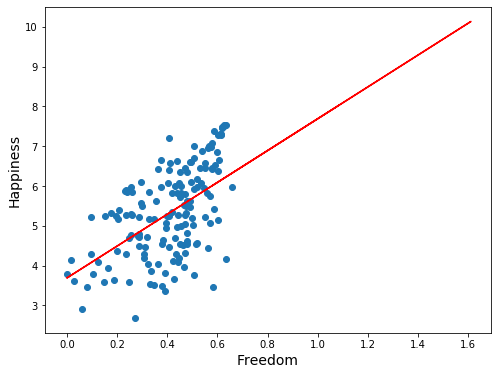

In [110]:
plt.figure(figsize=(8,6))
plt.scatter(data["Freedom"], data["Happiness"])
plt.xlabel("Freedom",fontsize=14)
plt.ylabel("Happiness",fontsize=14)
# add the predictions from regression
plt.plot(x, regressor.predict(x), color="red")
plt.show()

### Step 7. 
Repeat the process from Step 6, but this time use all three variables 'Family', 'Health' and 'Freedom' as the independent variables. Based on the values of MAE, MSE, and RMSE, which variable appears to be a better fit?

In [111]:
X = data[['Freedom','Family','Health']]
y = data['Happiness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [112]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
coef_dt = pd.DataFrame(regressor.coef_,X.columns,columns=["Coefficient"])
coef_dt

Coefficient
Freedom     1.721030
Family      1.369847
Health      2.290756

In [114]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head(25)

Actual  Predicted
Country                                    
Central African Republic   2.693   2.230061
Moldova                    5.838   5.200363
Yemen                      3.593   4.141915
Poland                     5.973   6.199186
Cameroon                   4.695   4.061966
Austria                    7.006   6.565693
Finland                    7.469   6.747927
Palestinian Territories    4.775   5.038160
Hungary                    5.324   5.438982
Senegal                    4.535   4.925094
Mexico                     6.578   5.716336
Malta                      6.527   6.655986
Thailand                   6.424   6.155257
Honduras                   5.181   5.221540
Philippines                5.430   5.517872
Egypt                      4.735   4.764456
Costa Rica                 7.079   6.399461
Zambia                     4.514   4.480216
Kosovo                     5.279   4.967913
South Korea                5.838   5.772555
Netherlands                7.377   6.542930
Azerbaijan                 5.234   5.223566
Togo                       3.495   3.533327
United Kingdom             6.714   6.490290
Denmark                    7.522   6.738680

In [115]:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

1.7209304503169074
[1.72102997 1.36984685 2.29075601]


In [116]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3588368679656312
Mean Squared Error: 0.20600095112533107
Root Mean Squared Error: 0.45387327650494147
